In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

from HelperFunctions import plot_corr
%reload_ext autoreload
%autoreload 2

In [2]:
df=pd.read_csv('lean_df_2.csv',index_col='id')
treat_df=df.copy()

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
treat_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135539299,15000.0,15000.0,14975.0,36 months,14.52,516.47,C,C3,Corporate Safety Director,10+ years,OWN,79000.0,Verified,Jun-2018,Current,debt_consolidation,021xx,MA,22.12,1.0,Oct-2003,0.0,7.0,NaN,0.0,10055.0,70.3,14.0,f,11835.16,11815.44,4624.030000,4616.32,3164.84,1459.19,0.0,0.00,0.0000,Mar-2019,516.47,Apr-2019,Mar-2019,0.0,7.0,Individual,NaN,NaN,NaN,0.0,0.0,0.0,1.0,18.0,43.0,1.0,8149.0,35.0,14300.0,0.0,0.0,0.0,85.8,0.0,0.0,132.0,176.0,13.0,13.0,28.0,18.0,1.0,1.0,0.0,1.0,0.0,92.9,0.0,0.0,101981.0,64046.0,677.0,0.0,0.500000,0.428571,0.000000,0.857143,0.166667,0.285714,0.500000,0.285714,0.428571
93400686,15000.0,15000.0,15000.0,36 months,12.74,503.54,C,C1,Teacher,10+ years,RENT,37112.0,Not Verified,Nov-2016,Charged Off,debt_consolidation,144xx,NY,22.64,0.0,Apr-2013,1.0,NaN,NaN,0.0,16877.0,87.0,6.0,w,0.00,0.00,2491.160000,2491.16,1758.39,732.77,0.0,0.00,0.0000,Apr-2017,503.54,NaN,Feb-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,0.0,34.0,13.0,3.0,4549.0,87.0,19300.0,0.0,0.0,1.0,87.0,0.0,0.0,34.0,43.0,4.0,4.0,4.0,4.0,0.0,5.0,NaN,0.0,1.0,100.0,0.0,0.0,29973.0,10673.0,667.0,0.0,0.833333,0.166667,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
97537996,2500.0,2500.0,2500.0,36 months,5.32,75.29,A,A1,NaN,NaN,MORTGAGE,19200.0,Not Verified,Feb-2017,Current,credit_card,758xx,TX,29.38,0.0,Apr-2001,0.0,NaN,NaN,0.0,4408.0,8.0,27.0,w,806.46,806.46,1881.510000,1881.51,1693.54,187.97,0.0,0.00,0.0000,Mar-2019,75.29,Apr-2019,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,0.0,41.0,94.0,0.0,1218.0,47.0,55100.0,0.0,0.0,0.0,8.5,0.0,0.0,149.0,189.0,33.0,33.0,33.0,NaN,0.0,10.0,0.0,0.0,0.0,100.0,0.0,0.0,125924.0,45824.0,812.0,19665.0,0.592593,0.333333,0.074074,0.812500,0.461538,0.375000,0.333333,0.812500,0.629630
141862198,20000.0,20000.0,20000.0,36 months,10.47,649.77,B,B2,General Manager,10+ years,MORTGAGE,50000.0,Not Verified,Oct-2018,Current,credit_card,117xx,NY,33.85,0.0,Feb-2000,0.0,NaN,NaN,0.0,26675.0,47.0,24.0,w,17581.82,17581.82,3237.220000,3237.22,2418.18,819.04,0.0,0.00,0.0000,Mar-2019,649.77,Apr-2019,Mar-2019,0.0,NaN,Joint App,105000.0,23.51,Not Verified,0.0,0.0,0.0,1.0,20.0,66.0,1.0,13869.0,55.0,56800.0,2.0,0.0,0.0,60.1,0.0,0.0,118.0,224.0,4.0,4.0,4.0,20.0,0.0,4.0,0.0,0.0,1.0,100.0,0.0,0.0,247137.0,43137.0,732.0,140786.0,0.625000,0.208333,0.166667,0.466667,0.571429,0.600000,0.400000,0.733333,0.583333
88965298,10000.0,10000.0,10000.0,36 months,12.79,335.93,C,C1,Staff Support lll,10+ years,MORTGAGE,39000.0,Verified,Sep-2016,Current,debt_consolidation,425xx,KY,33.38,4.0,Mar-1997,0.0,20.0,NaN,0.0,9187.0,95.7,25.0,f,1942.4

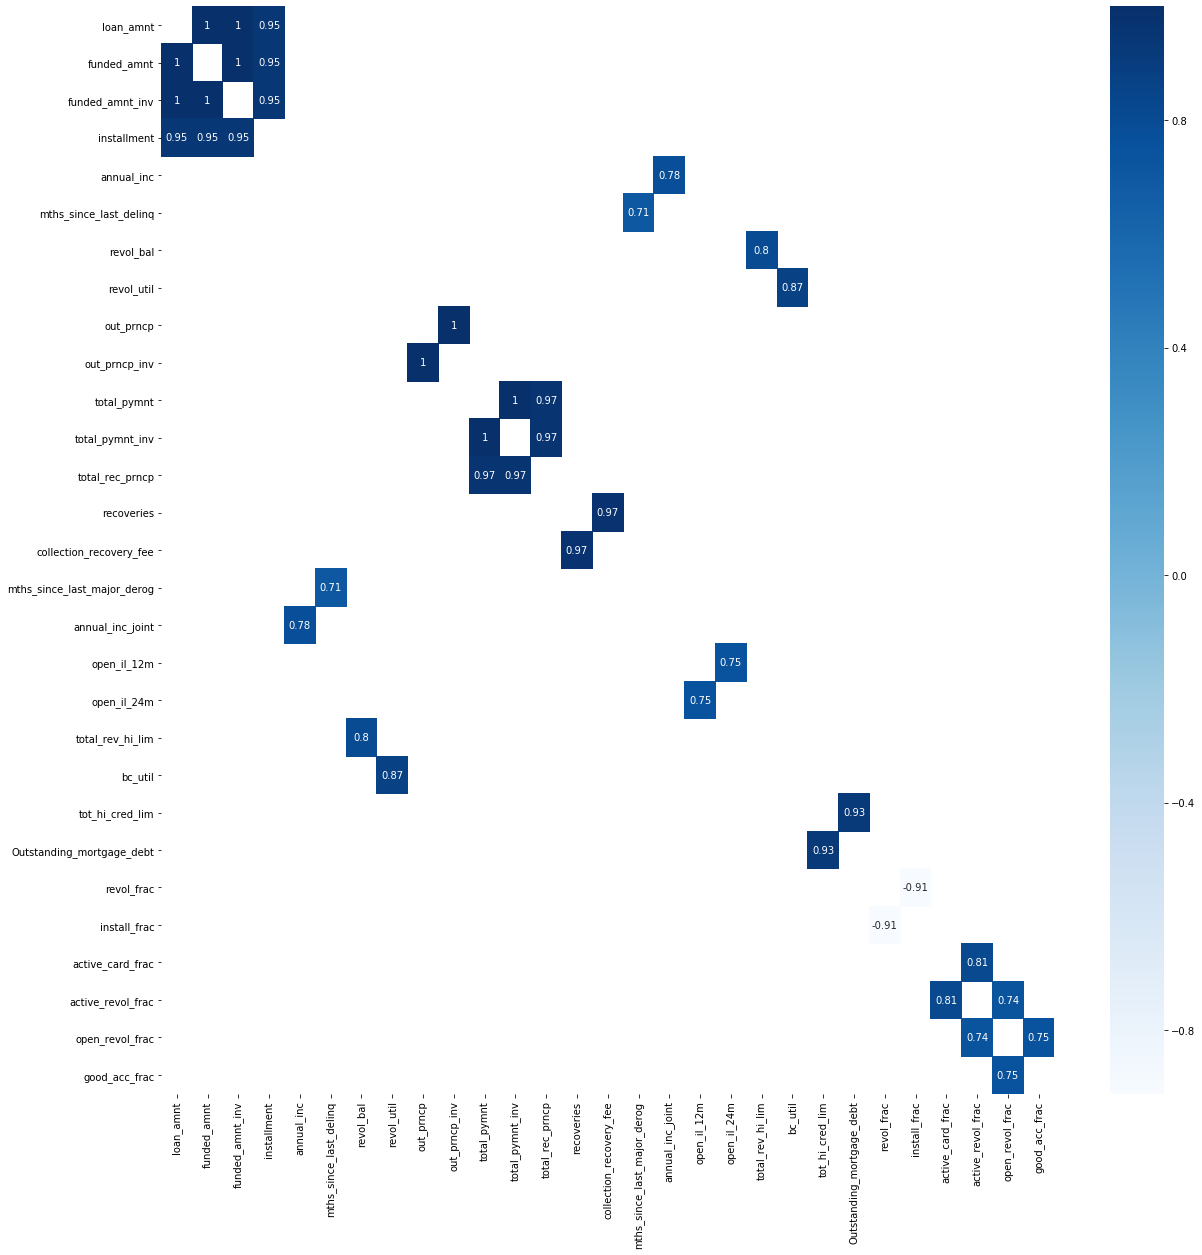

In [4]:
plot_corr(treat_df,threshold=0.7,size=20)

In [5]:
#### Removing any feature that are extremely highly correlated with other features
#### drop bc_util because it is included in revol_util and the fraction given by card_frac
#### drop out_prncp_inv <--- duplicate of out_prncp
#### drop total_pymnt_inv <--- duplicate of total_pymnt
#### drop revol_bal  <--- taken care of by total_rev_hi_lim and revol_util 
#### drop open_il_24m <--- duplicate of open_il_12m

In [6]:
print(pearsonr(treat_df.loc[~treat_df['open_il_12m'].isnull(),'open_il_12m'],treat_df.loc[~treat_df['open_il_12m'].isnull(),'int_rate']))
print(pearsonr(treat_df.loc[~treat_df['open_il_24m'].isnull(),'open_il_24m'],treat_df.loc[~treat_df['open_il_24m'].isnull(),'int_rate']))

(0.15879773288010451, 0.0)
(0.151846949642293, 0.0)


In [7]:
first_drop_df=treat_df.drop(['bc_util','out_prncp_inv','total_pymnt_inv',\
               'revol_bal','open_il_24m'],axis=1)

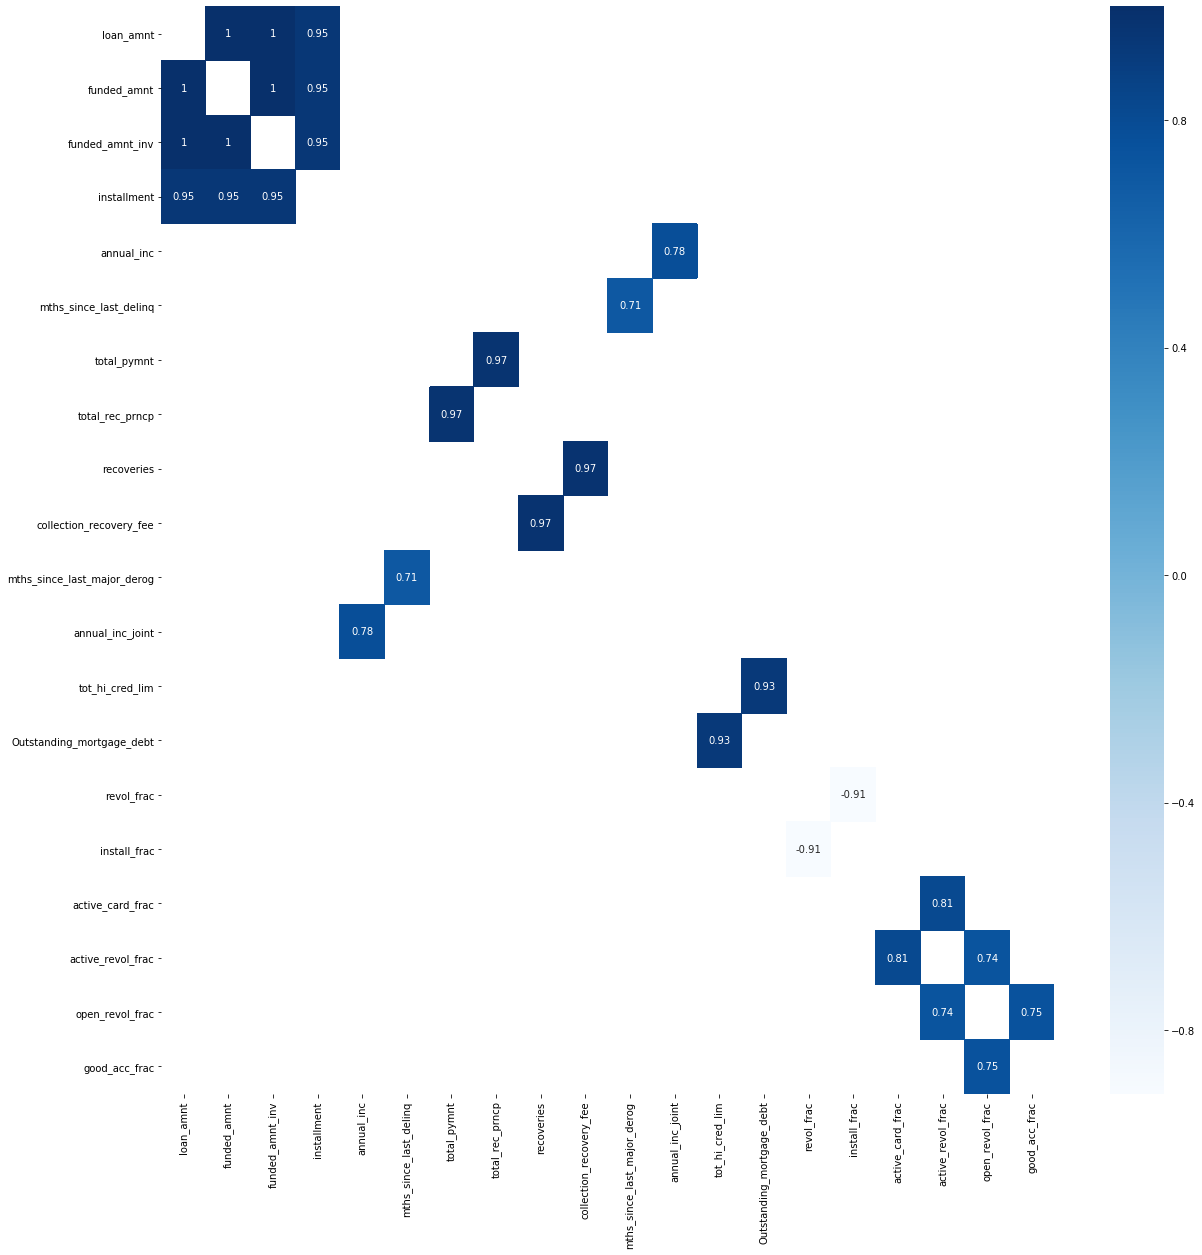

In [8]:
plot_corr(first_drop_df,threshold=0.7,size=20)

#### remove funded amount because they are basically the same as loan_amnt
#### remove installment because it is the same as loan amnt * int_rate
#### create a column: fully_invested = True if loan_amnt == funded_amnt_inv, else false. 

In [9]:
(first_drop_df.loc[:,'funded_amnt']!=first_drop_df.loc[:,'funded_amnt_inv']).sum()

151111

In [10]:
(first_drop_df.loc[:,'loan_amnt']!=first_drop_df.loc[:,'funded_amnt_inv']).sum()

151501

In [11]:
(first_drop_df.loc[:,'loan_amnt']!=first_drop_df.loc[:,'funded_amnt']).sum()

2065

In [12]:
first_drop_df['fully_invested']=first_drop_df.loc[:,'loan_amnt']==first_drop_df.loc[:,'funded_amnt_inv']
second_drop_df=first_drop_df.drop(['loan_amnt','funded_amnt_inv','installment'],axis=1)

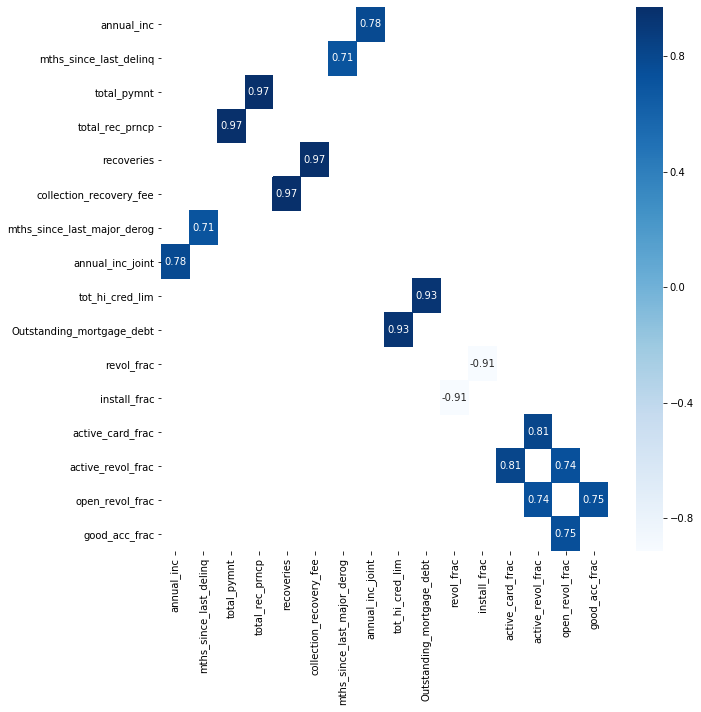

In [13]:
plot_corr(second_drop_df,threshold=0.7,size=10)

In [14]:
second_drop_df.shape

(2260668, 84)

In [15]:
df_number = second_drop_df.select_dtypes(include = 'number')
df_object = second_drop_df.select_dtypes(include = 'object')
df_category = second_drop_df.select_dtypes(include = 'category')
df_boolean = second_drop_df.select_dtypes(include = 'bool')
df_datetime = second_drop_df.select_dtypes(include = 'datetime')
df_timedelta = second_drop_df.select_dtypes(include = 'timedelta')
#######################################################
nominal_var=list(df_object.columns)
ordinal_var=list(df_number.columns)
continuous_var=list(df_number.columns)
time_var=list(df_datetime.columns)

In [16]:
print(len(np.array(nominal_var)))
print(len(np.array(continuous_var)))

19
64


In [17]:
second_drop_df.to_csv('lean_df_3.csv')

In [18]:
second_drop_df.head(10)

,funded_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_il_12m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,fully_invested
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,Aug-2003,1.0,30.0,NaN,0.0,29.7,13.0,w,0.00,4421.723917,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,0.0,21.0,36.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,0.0,0.0,148.0,128.0,3.0,3.0,4.0,4.0,2.0,2.0,0.0,0.0,3.0,76.9,0.0,0.0,178050.0,13734.0,677.0,137158.0,0.692308,0.230769,0.076923,0.555556,0.400000,0.444444,0.666667,0.444444,0.538462,True
68355089,24700.0,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,577xx,SD,16.06,1.0,Dec-1999,4.0,6.0,NaN,0.0,19.2,38.0,w,0.00,25679.660000,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,19.0,73.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,0.0,0.0,113.0,192.0,2.0,2.0,2.0,0.0,0.0,13.0,0.0,0.0,2.0,97.4,0.0,0.0,314017.0,24667.0,717.0,164921.0,0.710526,0.157895,0.105263,0.629630,0.294118,0.185185,0.166667,0.740741,0.578947,True
68341763,20000.0,60 months,10.78,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,605xx,IL,10.78,0.0,Aug-2000,0.0,NaN,NaN,0.0,56.2,18.0,w,0.00,22705.924294,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,0.0,NaN,Joint App,71000.0,13.85,Not Verified,0.0,0.0,0.0,19.0,73.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,0.0,0.0,125.0,184.0,14.0,14.0,101.0,10.0,0.0,2.0,0.0,0.0,0.0,100.0,0.0,0.0,218418.0,14877.0,697.0,171003.0,0.388889,0.333333,0.277778,0.571429,0.500000,0.428571,0.166667,0.571429,0.333333,True
66310712,35000.0,60 months,14.85,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,076xx,NJ,17.06,0.0,Sep-2008,0.0,NaN,NaN,0.0,11.6,17.0,w,15897.65,31464.010000,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,23.0,70.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,0.0,0.0,36.0,87.0,2.0,2.0,2.0,NaN,0.0,8.0,0.0,0.0,1.0,100.0,0.0,0.0,381215.0,18000.0,787.0,249274.0,0.764706,0.117647,0.058824,0.769231,0.400000,0.384615,0.500000,0.769231,0.764706,True
68476807,10400.0,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,174xx,PA,25.37,1.0,Jun-1998,3.0,12.0,NaN,0.0,64.5,35.0,w,0.00,11740.500000,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,NaN,Mar-2018,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,14.0,84.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,0.0,0.0,128.0,210.0,4.0,4.0,4.0,1.0,0.0,5.0,0.0,0.0,4.0,96.6,0.0,0.0,439570.0,88097.0,697.0,235962.0,0.542857,0.285714,0.